#### Analysis of PCA of several animals

In [1]:
cd ../utilities/

/home/gustav/Documents/DD142X/code/utilities


In [2]:
from features import ffv
from matlab_util import str_lfp, gp_lfp
from plotting import rasterize

In [3]:
cd ../_data/matlabData

/home/gustav/Documents/DD142X/code/_data/matlabData


In [4]:
files = !ls
print(files)

['NPR-075.b11.mat', 'NPR-075.b13.mat', 'NPR-075.c013.mat', 'NPR-075.c08.mat', 'NPR-075.d07.mat', 'NPR-076.b05.mat', 'NPR-076.b09.mat', 'NPR-076.c09.mat', 'NPR-076.d07.mat']


In [15]:
import numpy as np
import matplotlib.pyplot as plt

ep = 2 ** 11

str_epochs = np.concatenate([
    str_lfp(filename, ep).reshape((-1, ep)) for filename in files
], axis = 0)

gp_epochs = np.concatenate([
    gp_lfp(filename, ep).reshape((-1, ep)) for filename in files
], axis = 0)

print(str_epochs.shape)
print(gp_epochs.shape)

(65872, 2048)
(97678, 2048)


In [16]:
strides = 10

incr_str = int(str_epochs.shape[0] / strides)
strs = [
    ffv(
        str_epochs[i * incr_str : (i + 1) * incr_str],
        epoch_size = ep
    ) for i in range(0, strides)
]

incr_gp = int(gp_epochs.shape[0] / strides)
gps = [
    ffv(
        gp_epochs[i * incr_gp : (i + 1) * incr_gp],
        epoch_size = ep
    ) for i in range(0, strides)
]

for str_, _ in strs:
    print(str_.shape)
for gp_, _ in gps:
    print(gp_.shape)

(6587, 18)
(6587, 18)
(6587, 18)
(6587, 18)
(6587, 18)
(6587, 18)
(6587, 18)
(6587, 18)
(6587, 18)
(6587, 18)
(9767, 18)
(9767, 18)
(9767, 18)
(9767, 18)
(9767, 18)
(9767, 18)
(9767, 18)
(9767, 18)
(9767, 18)
(9767, 18)


In [17]:
frqs = strs[0][1]
print(frqs)

[12.6953125 13.671875  14.6484375 15.625     16.6015625 17.578125
 18.5546875 19.53125   20.5078125 21.484375  22.4609375 23.4375
 24.4140625 25.390625  26.3671875 27.34375   28.3203125 29.296875 ]


In [18]:
strs = [str_ for str_, _ in strs]
gps = [ gp_ for gp_, _ in gps]

In [19]:
strs = np.array(strs)
gps = np.array(gps)
print(strs.shape)
print(gps.shape)

(10, 6587, 18)
(10, 9767, 18)


In [20]:
strs = strs.reshape((-1, 18))
gps = gps.reshape((-1, 18))
print(strs.shape)
print(gps.shape)

(65870, 18)
(97670, 18)


In [21]:
from sklearn.decomposition import PCA

all_lfp = np.concatenate((strs, gps), axis = 0)
print(all_lfp.shape)

(163540, 18)


In [22]:
pca = PCA(n_components = 2).fit(all_lfp.copy())

In [23]:
pca_all = pca.transform(all_lfp.copy())
pca_str = pca.transform(strs.copy())
pca_gp  = pca.transform(gps.copy())

print(pca_all.shape)
print(pca_str.shape)
print(pca_gp.shape)

(163540, 2)
(65870, 2)
(97670, 2)


PCA n = 163540


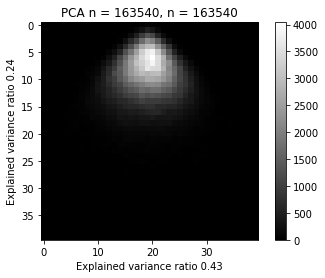

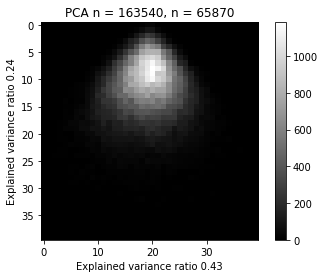

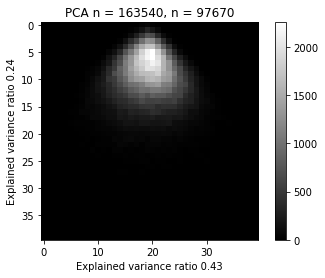

In [24]:
print("PCA n = " + str(pca_all.shape[0]))
x1var, x2var = pca.explained_variance_ratio_
x1var = round(x1var, 2)
x2var = round(x2var, 2)

raster_all = rasterize(pca_all)
plt.imshow(raster_all, cmap = 'gray', vmin = np.min(raster_all), vmax = np.max(raster_all))
plt.title("PCA n = " + str(pca_all.shape[0]) + ", n = " + str(pca_all.shape[0]))
plt.xlabel("Explained variance ratio " + str(x1var))
plt.ylabel("Explained variance ratio " + str(x2var))
plt.colorbar()
plt.show()

raster_str = rasterize(pca_str)
plt.imshow(raster_str, cmap = 'gray', vmin = np.min(raster_str), vmax = np.max(raster_str))
plt.title("PCA n = " + str(pca_all.shape[0]) + ", n = " + str(pca_str.shape[0]))
plt.xlabel("Explained variance ratio " + str(x1var))
plt.ylabel("Explained variance ratio " + str(x2var))
plt.colorbar()
plt.show()

raster_gp = rasterize(pca_gp)
plt.imshow(raster_gp, cmap = 'gray', vmin = np.min(raster_gp), vmax = np.max(raster_gp))
plt.title("PCA n = " + str(pca_all.shape[0]) + ", n = " + str(pca_gp.shape[0]))
plt.xlabel("Explained variance ratio " + str(x1var))
plt.ylabel("Explained variance ratio " + str(x2var))
plt.colorbar()
plt.show()